<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [65]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import seaborn as sns

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
## Load the Diabetes dataset
diabetes = datasets.load_diabetes() #imports dictionary
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Prepare input data

In [5]:
# predictors
X = pd.DataFrame(diabetes.data, columns = diabetes['feature_names'])
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
# target
y = diabetes['target']

### Split the data (training/test)

In [7]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Create the model's architecture

In [91]:
# set up model architecture
model = Sequential()

In [69]:
X_train.shape

(309, 10)

In [92]:
n_cols = X.shape[1]

In [93]:
# add the first hidden layer
model.add(Dense(50,
               activation = 'linear',
               input_shape = (n_cols, )))

# add the second hidden layer
model.add(Dense(10,
               activation = 'linear'))

# add the output layer
model.add(Dense(1, #1 because we're predicting 1 output value
               activation = 'linear')) #can also be relu: https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

In [94]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 1,071
Trainable params: 1,071
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
# compile model
model.compile(#optimizer = 'sgd',
              loss='mse',
              metrics=[MeanSquaredError()],
              optimizer=Adam(learning_rate=0.1))

In [96]:
# fit model
history = model.fit(X_train, y_train,
                   validation_split = 0.25, #calculate validation results on 25% of training data
                   epochs = 20) 

Train on 231 samples, validate on 78 samples
Epoch 1/20
231/231 [==============================] - 0s 653us/step - loss: 20009.4911 - mean_squared_error: 20009.4922 - val_loss: 9276.5619 - val_mean_squared_error: 9276.5615
Epoch 2/20
231/231 [==============================] - 0s 52us/step - loss: 7454.3764 - mean_squared_error: 7454.3760 - val_loss: 7873.0553 - val_mean_squared_error: 7873.0552
Epoch 3/20
231/231 [==============================] - 0s 43us/step - loss: 4935.9302 - mean_squared_error: 4935.9302 - val_loss: 3628.5970 - val_mean_squared_error: 3628.5969
Epoch 4/20
231/231 [==============================] - 0s 48us/step - loss: 4108.7280 - mean_squared_error: 4108.7280 - val_loss: 4223.9813 - val_mean_squared_error: 4223.9810
Epoch 5/20
231/231 [==============================] - 0s 52us/step - loss: 3440.5717 - mean_squared_error: 3440.5715 - val_loss: 2647.0870 - val_mean_squared_error: 2647.0869
Epoch 6/20
231/231 [==============================] - 0s 52us/step - loss: 31

In [97]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

In [98]:
len(history.history['loss'])

20

### Create predictions

In [99]:
predictions = model.predict(X_test)
predictions

array([[ 90.456314],
       [ 84.62077 ],
       [175.75644 ],
       [ 49.449726],
       [152.26965 ],
       [176.61098 ],
       [203.8697  ],
       [118.3289  ],
       [146.85623 ],
       [115.726166],
       [181.88141 ],
       [163.97238 ],
       [ 87.7728  ],
       [ 65.82141 ],
       [214.7307  ],
       [191.00494 ],
       [162.82523 ],
       [ 81.934875],
       [102.43086 ],
       [144.73326 ],
       [173.6492  ],
       [ 76.96629 ],
       [126.07379 ],
       [ 90.55525 ],
       [ 74.45032 ],
       [186.89304 ],
       [ 85.31079 ],
       [156.9635  ],
       [113.42755 ],
       [168.14838 ],
       [130.33423 ],
       [108.520325],
       [159.19566 ],
       [ 84.87627 ],
       [135.60194 ],
       [165.5383  ],
       [ 83.78676 ],
       [218.15977 ],
       [151.6263  ],
       [157.45859 ],
       [141.59064 ],
       [161.17212 ],
       [109.566376],
       [111.16153 ],
       [120.38869 ],
       [177.26964 ],
       [126.08124 ],
       [116.0

### Evaluate the model

In [100]:
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

133/133 [==============================] - 0s 37us/step

Test loss: 3340.752680, Test accuracy: 3340.752686


### Visualisation of cost and error

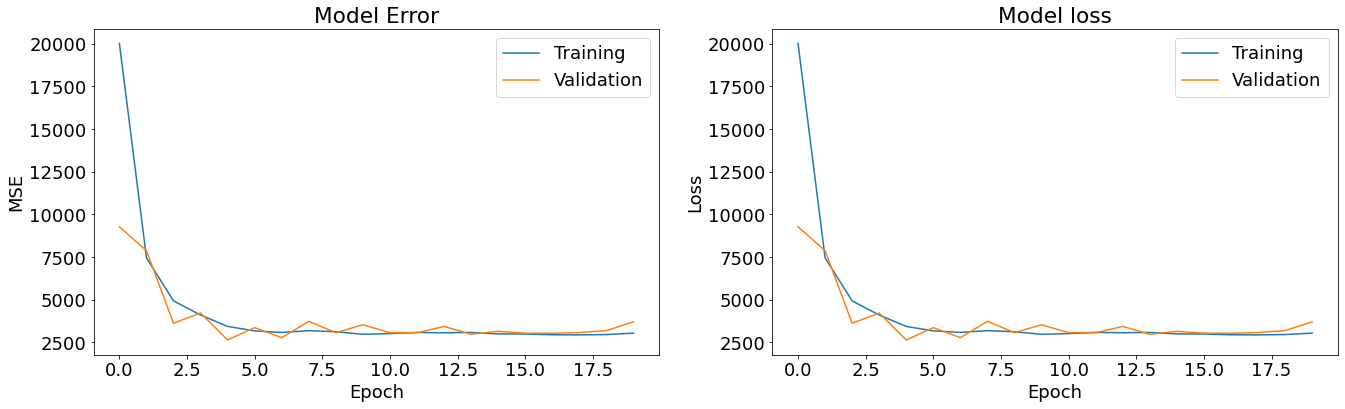

In [101]:
# insert code here

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
#ax[0].plot(model.history.history['accuracy'], label = 'Training')
#ax[0].plot(model.history.history['val_accuracy'], label = 'Validation')
ax[0].plot(history.history['mean_squared_error'], label = 'Training')
ax[0].plot(history.history['val_mean_squared_error'], label = 'Validation')

ax[0].set_title('Model Error')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
# ax[1].plot(model.history.history['loss'], label = 'Training')
# ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



